In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# %cd BT4222/Data

In [2]:
# %cd /content/drive/My Drive/Data

/content/drive/.shortcut-targets-by-id/1ULLLy85cSk9PIcDP9L47wxLxA2Loq2AX/Data


In [3]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

Load users, games, recommendations, and games_metadata

In [ ]:
users = pd.read_csv('users.csv')
users.shape

(14306064, 3)

In [ ]:
games = pd.read_csv('games.csv')
games.shape

(50872, 13)

In [ ]:
recommendations = pd.read_csv('recommendations.csv')
recommendations.shape

(41154794, 8)

In [ ]:
games_metadata = []

with open('games_metadata.json', 'r', encoding='utf-8') as file:
    for line in file:
        data = json.loads(line.strip())
        games_metadata.append(data)

# Create a DataFrame from the review_data
games_metadata_df = pd.DataFrame(games_metadata)

games_metadata_df.shape

(50872, 3)

In [ ]:
games_metadata

[{'app_id': 13500,
  'description': 'Enter the dark underworld of Prince of Persia Warrior Within, the sword-slashing sequel to the critically acclaimed Prince of Persia: The Sands of Time™. Hunted by Dahaka, an immortal incarnation of Fate seeking divine retribution, the Prince embarks upon a path of both carnage and mystery to defy his preordained death.',
  'tags': ['Action',
   'Adventure',
   'Parkour',
   'Third Person',
   'Great Soundtrack',
   'Singleplayer',
   'Platformer',
   'Time Travel',
   'Atmospheric',
   'Classic',
   'Hack and Slash',
   'Time Manipulation',
   'Gore',
   'Fantasy',
   'Story Rich',
   'Dark',
   'Open World',
   'Controller',
   'Dark Fantasy',
   'Puzzle']},
 {'app_id': 22364, 'description': '', 'tags': ['Action']},
 {'app_id': 113020,
  'description': "Monaco: What's Yours Is Mine is a single player or co-op heist game. Assemble a crack team of thieves, case the joint, and pull off the perfect heist.",
  'tags': ['Co-op',
   'Stealth',
   'Indie'

Explore users dataset

In [ ]:
users.head()
# user_id - unique user ID
# products - Number of games/add-ons purchased by the user
# reviews - Number of reviews published

,user_id,products,reviews
0,7360263,359,0
1,14020781,156,1
2,8762579,329,4
3,4820647,176,4
4,5167327,98,2


Check number of unique users

In [ ]:
# Check number of unique users
unique_users = users.drop_duplicates(subset = 'user_id')
unique_users.shape

(14306064, 3)

Check the distribution of number of product purchased and reviews given

In [ ]:
# Max number of games purchased
users['products'].max()

32214

In [ ]:
# Look at the num of products purchased
products_count_df = users['products'].value_counts().reset_index()

products_count_df.columns = ['Product', 'Count']

products_count_df

,Product,Count
0,7,171676
1,8,170809
2,6,170332
3,9,170293
4,10,169469
...,...,...
7567,4908,1
7568,8271,1
7569,9227,1
7570,6158,1


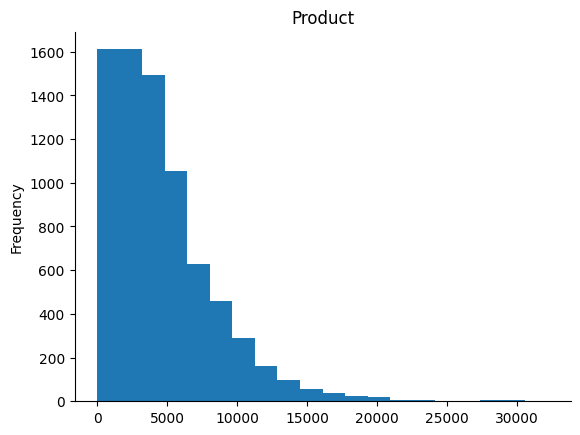

In [ ]:
# @title Product
# Distribution of number of games purchased
from matplotlib import pyplot as plt
products_count_df['Product'].plot(kind='hist', bins=20, title='Product')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Look at the num of ratings given
reviews_count_df = users['reviews'].value_counts().reset_index()

reviews_count_df.columns = ['Number of reviews', 'Count']

reviews_count_df

,Number of reviews,Count
0,1,7573027
1,2,2436378
2,3,1178593
3,4,682230
4,0,525005
...,...,...
676,858,1
677,1100,1
678,1347,1
679,406,1


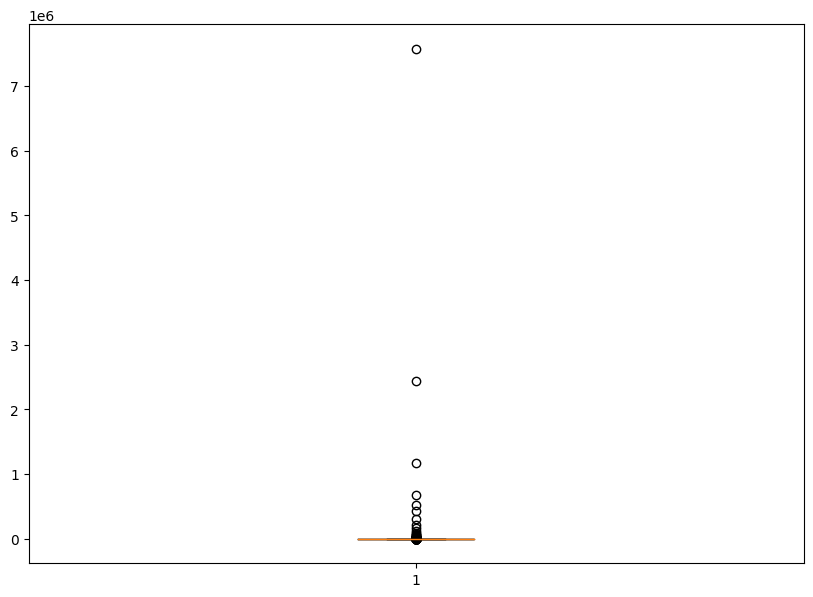

In [ ]:
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot(reviews_count_df['Count'])

# show plot
plt.show()

In [ ]:
reviews_count_df.describe()

,Number of reviews,Count
count,681.000000,6.810000e+02
mean,463.030837,2.100744e+04
std,527.729449,3.103853e+05
min,0.000000,1.000000e+00
25%,170.000000,1.000000e+00
50%,341.000000,4.000000e+00
75%,569.000000,3.300000e+01
max,6045.000000,7.573027e+06


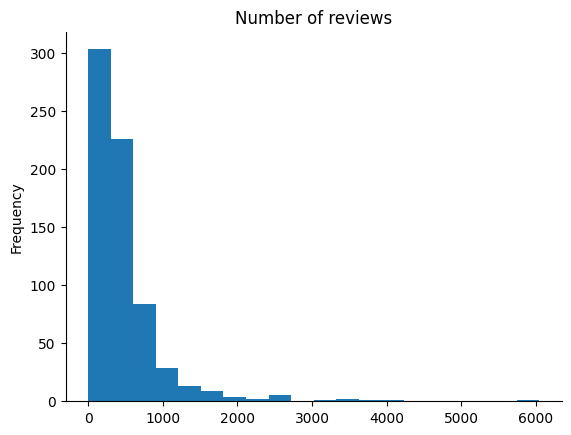

In [ ]:
# @title Number of reviews

from matplotlib import pyplot as plt
reviews_count_df['Number of reviews'].plot(kind='hist', bins=20, title='Number of reviews')
plt.gca().spines[['top', 'right',]].set_visible(False)

Explore games dataset

Number of unique games

In [ ]:
games.head()
# app_id - Native product ID on Steam
# title - Product title
# date_release - Product release date
# win/mac/linux - supports windows/macOS/linux
# rating - Product rating category
# positive_ratio - Ratio of positive feedbacks
# user_reviews - Amount of user reviews availble on the Steam page (NOT in the dataset)
# price_final - in USD, price_original - discount

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True


In [ ]:
# Check unique app_id
unique_games = games.drop_duplicates(subset = 'app_id')
print(f"Number of rows of games: {games.shape[0]}")
print(f"Number of unique rows of games: {unique_games.shape[0]}")

Number of rows of games: 50872
Number of unique rows of games: 50872


In [ ]:
# check unique title
unique_games = games.drop_duplicates(subset = 'title')
print(f"Number of unique rows of games: {unique_games.shape[0]}")

Number of unique rows of games: 50751


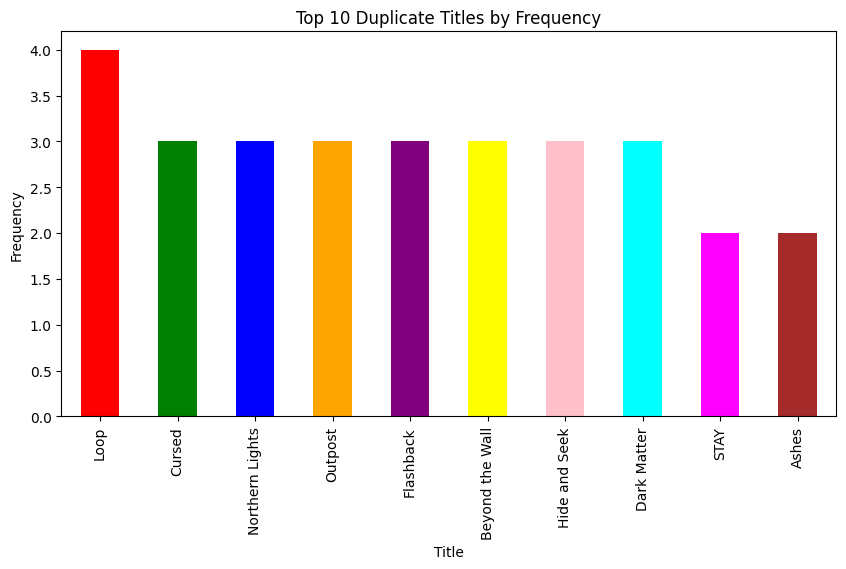

In [ ]:
# Find duplicate titles
duplicate_titles = games[games.duplicated(subset='title', keep=False)]['title'].unique()

# Calculate the frequency of each duplicate title
title_frequency = games[games['title'].isin(duplicate_titles)]['title'].value_counts()

# Get the top 5 duplicate titles
top_5_titles = title_frequency.head(5)

# Get the top 10 duplicate titles
top_10_titles = title_frequency.head(10)

# Plot the graph
colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'pink', 'cyan', 'magenta', 'brown']
fig, ax = plt.subplots(figsize=(10, 5))
top_10_titles.plot(kind='bar', color=colors, ax=ax)

# Add title and labels
ax.set_title('Top 10 Duplicate Titles by Frequency')
ax.set_xlabel('Title')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

In [ ]:
unique_games = games.drop_duplicates(subset='title', keep=False)
dropped_rows = games[~games.index.isin(unique_games.index)]

print("Dropped Rows:")
print(dropped_rows)

Dropped Rows:
        app_id              title date_release   win    mac  linux  \
683    2233890        Prison Wars   2023-01-06  True  False  False   
966    1452500      The Good Life   2021-10-15  True  False  False   
2336    844040               RUSH   2018-07-13  True  False  False   
2661   1526180      Hide and Seek   2021-11-12  True  False  False   
2810    574180           Remnants   2021-03-05  True  False  False   
...        ...                ...          ...   ...    ...    ...   
50098  2340010             Ritual   2023-05-02  True  False  False   
50119  2314110            Shutter   2023-04-28  True  False  False   
50500  2365200               Loop   2023-06-25  True   True   True   
50585  2239320        The Visitor   2022-12-22  True  False  False   
50654  2057420  Blade of Darkness   2022-07-19  True  False  False   

                rating  positive_ratio  user_reviews  price_final  \
683           Positive              92            14         1.99   
966    

In [ ]:
occurrences_prison_wars = games[games['title'] == 'Prison Wars']
print(occurrences_prison_wars)

        app_id        title date_release   win    mac  linux    rating  \
683    2233890  Prison Wars   2023-01-06  True  False  False  Positive   
41553  1529290  Prison Wars   2022-03-30  True   True  False     Mixed   

       positive_ratio  user_reviews  price_final  price_original  discount  \
683                92            14         1.99            1.99       0.0   
41553              63            19         0.00            0.00       0.0   

       steam_deck  
683          True  
41553        True  


In [ ]:
occurrences_prison_wars = games[games['title'] == 'The Good Life']
print(occurrences_prison_wars)

        app_id          title date_release   win    mac  linux         rating  \
966    1452500  The Good Life   2021-10-15  True  False  False  Very Positive   
20768   293340  The Good Life   2014-11-21  True  False  False          Mixed   

       positive_ratio  user_reviews  price_final  price_original  discount  \
966                80           120        29.99           29.99       0.0   
20768              51           135         9.99            9.99       0.0   

       steam_deck  
966          True  
20768        True  


In [ ]:
occurrences_prison_wars = games[games['title'] == 'RUSH']
print(occurrences_prison_wars)

      app_id title date_release   win    mac  linux         rating  \
2336  844040  RUSH   2018-07-13  True  False  False  Very Positive   
9917   38720  RUSH   2010-12-03  True   True   True  Very Positive   

      positive_ratio  user_reviews  price_final  price_original  discount  \
2336              82           186        19.99           19.99       0.0   
9917              89          1070         0.99            0.99       0.0   

      steam_deck  
2336        True  
9917        True  


In [ ]:
# games_test = games[['title','app_id']].copy()

In [ ]:
# sorted_df = games_test.sort_values(by='title')
# sorted_df

In [ ]:
# not_matched_df = games_test.groupby('title').filter(lambda x: len(x['app_id'].unique()) > 1)

# print("Rows where titles for the same app_id are not the same:")
# sorted_df = not_matched_df.sort_values(by='app_id')
# sorted_df

Distrubution of game released date

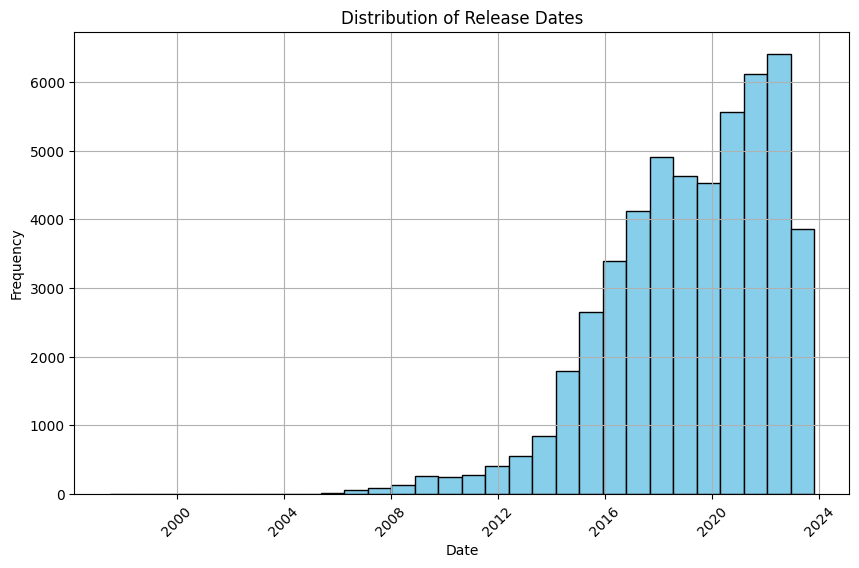

In [ ]:
games['date_release'] = pd.to_datetime(games['date_release'])
# Plot histogram of date distribution
plt.figure(figsize=(10, 6))
plt.hist(games['date_release'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Release Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
games['date_release'].min()

Timestamp('1997-06-30 00:00:00')

In [ ]:
games['date_release'].max()

Timestamp('2023-10-24 00:00:00')

In [ ]:
# Add column 'Player' to games to indicate wheter game is Single Player or Multi Player

def determine_player(tags):
    if 'Singleplayer' in tags and 'Multiplayer' in tags:
        return 'unknown'
    elif 'Singleplayer' in tags:
        return 'Singleplayer'
    elif 'Multiplayer' in tags:
        return 'Multiplayer'
    else:
        return 'unknown'

games_metadata_df['player'] = games_metadata_df['tags'].apply(determine_player)


# Merge metadata_df with games_df on 'app_id'
merged_df = pd.merge(games, games_metadata_df[['app_id', 'player']], on='app_id', how='left')

# Step 4: Write the updated DataFrame to a new CSV file
merged_df.to_csv('updated_games.csv', index=False)

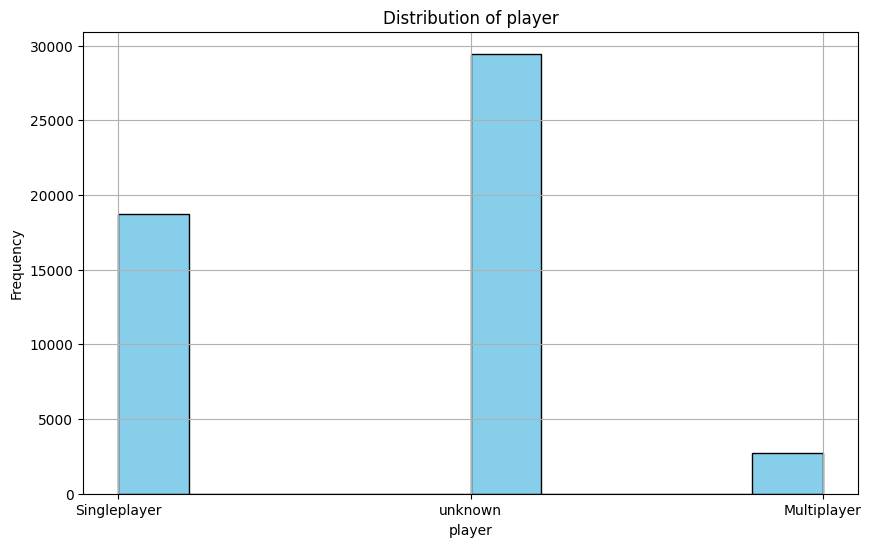

In [ ]:
# Check distribution of games based on 'player' column
plt.figure(figsize=(10, 6))
plt.hist(merged_df['player'], color='skyblue', edgecolor='black')
plt.title('Distribution of player')
plt.xlabel('player')
plt.ylabel('Frequency')
plt.grid(True)

In [ ]:
# Add genre column
def determine_genre(tags):
    action_genres = ['Action', 'Platformer', 'Racing', 'Fighting', 'Survival', 'Stealth', 'MMORPG', 'MOBA', 'Battle Royale', 'Roguelike']
    adventure_genres = ['Adventure']
    strategy_genres = ['Strategy']
    simulation_genres = ['Simulation', 'Sandbox']
    puzzle_genres = ['Puzzle']
    sports_genres = ['Sports']
    horror_genres = ['Horror']
    idler_genres = ['Idler']
    educational_genres = ['Educational']

    if any(tag in tags for tag in action_genres):
        return 'Action'
    elif any(tag in tags for tag in adventure_genres):
        return 'Adventure'
    elif any(tag in tags for tag in strategy_genres):
        return 'Strategy'
    elif any(tag in tags for tag in simulation_genres):
        return 'Simulation'
    elif any(tag in tags for tag in puzzle_genres):
        return 'Puzzle'
    elif any(tag in tags for tag in sports_genres):
        return 'Sports'
    elif any(tag in tags for tag in horror_genres):
        return 'Horror'
    elif any(tag in tags for tag in idler_genres):
        return 'Idler'
    elif any(tag in tags for tag in educational_genres):
        return 'Educational'
    else:
        return 'Unknown'

games_metadata_df['genre'] = games_metadata_df['tags'].apply(determine_genre)

# Merge metadata_df with games_df on 'app_id'
merged_df = pd.merge(games, games_metadata_df[['app_id', 'genre']], on='app_id', how='left')

# Step 4: Write the updated DataFrame to a new CSV file
merged_df.to_csv('updated_games2.csv', index=False)

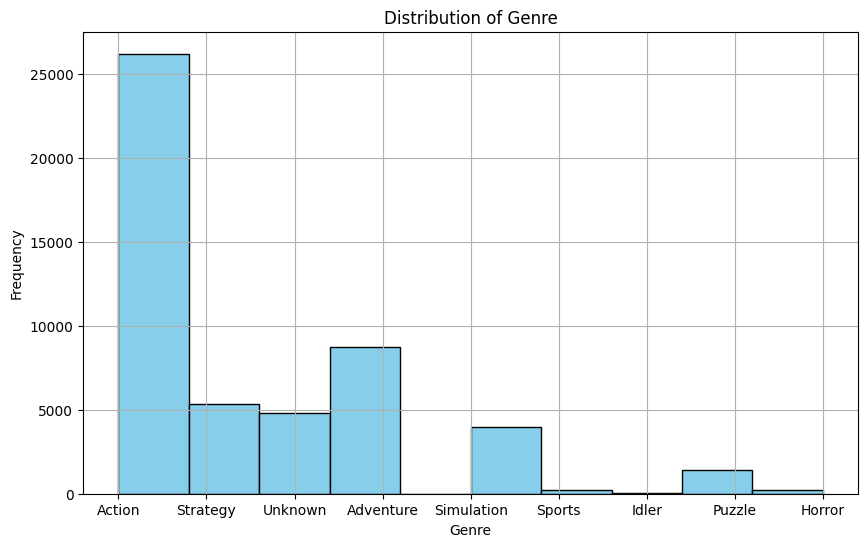

In [ ]:
# Check distribution of games based on 'genre' column
plt.figure(figsize=(10, 6))
plt.hist(merged_df['genre'], color='skyblue', edgecolor='black')
plt.title('Distribution of Genre')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.grid(True)

# Rating

In [ ]:
games['rating'].unique()

array(['Very Positive', 'Positive', 'Mixed', 'Mostly Positive',
       'Overwhelmingly Positive', 'Negative', 'Mostly Negative',
       'Overwhelmingly Negative', 'Very Negative'], dtype=object)

In [ ]:
rating_counts = games['rating'].value_counts()
print(rating_counts)

Positive                   13502
Very Positive              13139
Mixed                      12157
Mostly Positive             8738
Mostly Negative             1849
Overwhelmingly Positive     1110
Negative                     303
Very Negative                 60
Overwhelmingly Negative       14
Name: rating, dtype: int64


In [ ]:
# Number of -ve is relatively lesser than +ve

# Create a new column with grouped categories
games['rating_group'] = games['rating'].apply(lambda x: 'Positive' if 'Positive' in x else ('Negative' if 'Negative' in x else 'Neutral'))

# Calculate the proportions
rating_group_counts = games['rating_group'].value_counts(normalize=True)

# Print the proportions
print("Proportions of Ratings:")
print(rating_group_counts)


Proportions of Ratings:
Positive    0.717271
Neutral     0.238972
Negative    0.043757
Name: rating_group, dtype: float64


Text(0, 0.5, 'Proportions')

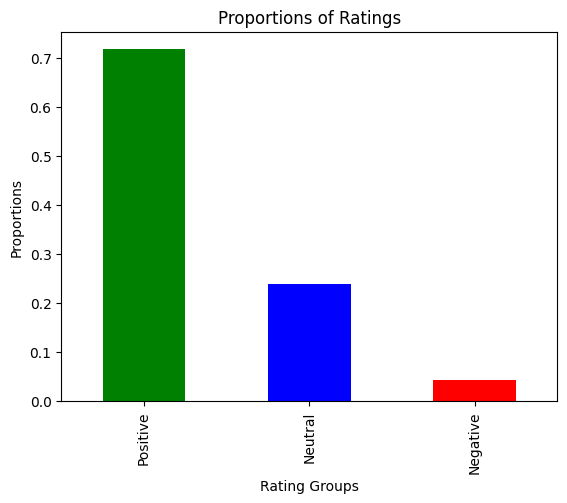

In [ ]:
# Plot the graph
rating_group_counts.plot(kind='bar', color=['green', 'blue', 'red'])

# Add titles and labels
plt.title('Proportions of Ratings')
plt.xlabel('Rating Groups')
plt.ylabel('Proportions')


Price of Games

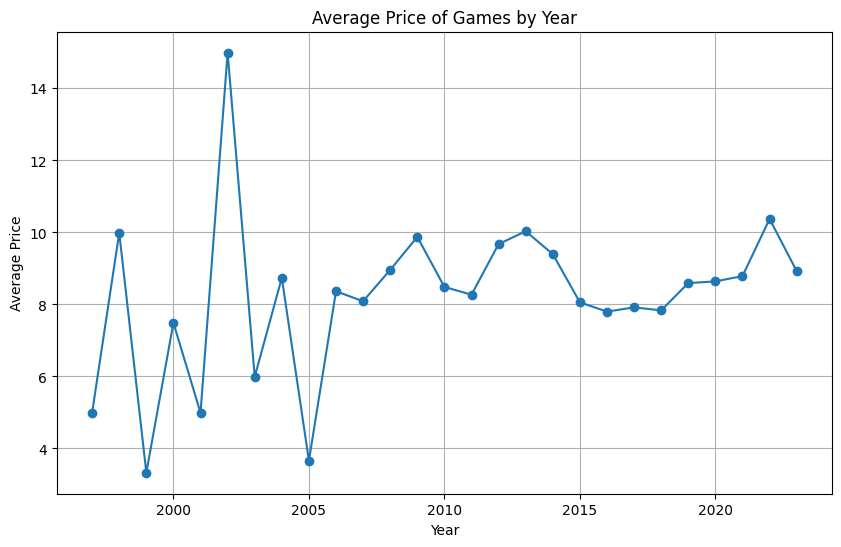

In [ ]:
# Assuming 'games' is your DataFrame
games['date_release'] = pd.to_datetime(games['date_release'])  # Convert to datetime if not already
games['year'] = games['date_release'].dt.year  # Extract year from date_release

# Group by year and calculate the average price
average_price_by_year = games.groupby('year')['price_original'].mean()

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(average_price_by_year.index, average_price_by_year.values, marker='o')
plt.title('Average Price of Games by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

Games_metadata

In [ ]:
games_metadata_df.head()

,app_id,description,tags,player,genre
0,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre...",Singleplayer,Action
1,22364,,[Action],unknown,Action
2,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St...",unknown,Action
3,226560,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P...",unknown,Action
4,249050,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra...",Singleplayer,Action


Merge app_id from games_metadata to games

In [ ]:
new_games = games.merge(games_metadata_df, on='app_id', how='right')
new_games.shape

(50872, 19)

In [ ]:
new_games.head()


,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,rating_group,year,description,tags,player,genre
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True,Positive,2008,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre...",Singleplayer,Action
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True,Positive,2011,,[Action],unknown,Action
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True,Positive,2013,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St...",unknown,Action
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True,Neutral,2014,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P...",unknown,Action
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True,Positive,2014,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra...",Singleplayer,Action


In [ ]:
new_games.to_excel("combines_games.xlsx")

In [ ]:
from collections import defaultdict
# Initialize a defaultdict to count the occurrences of each genre
genre_count = defaultdict(int)

# Iterate through each row in the 'tags' column of the DataFrame
for tags_list in new_games['tags']:
    # Iterate through each genre in the row
    for genre in tags_list:
        # Increment the count for the current genre
        genre_count[genre] += 1

# Convert the defaultdict to a regular dictionary
genre_count_dict = dict(genre_count)


sorted_genre_count = dict(sorted(genre_count_dict.items(), key=lambda item: item[1], reverse=True))

print(sorted_genre_count)


{'Indie': 27957, 'Singleplayer': 22566, 'Action': 21897, 'Adventure': 20183, 'Casual': 17844, 'Simulation': 12691, '2D': 11438, 'Strategy': 11093, 'RPG': 10156, 'Atmospheric': 8688, 'Puzzle': 7585, 'Story Rich': 7149, 'Multiplayer': 6575, '3D': 6142, 'Pixel Graphics': 6028, 'Exploration': 5769, 'Cute': 5702, 'Colorful': 5693, 'Free to Play': 5645, 'First-Person': 5570, 'Early Access': 5308, 'Fantasy': 5174, 'Anime': 5002, 'Funny': 4956, 'Horror': 4789, 'Arcade': 4502, 'Shooter': 4389, 'Family Friendly': 4286, 'Female Protagonist': 4222, 'Retro': 4153, 'Sci-fi': 4113, 'Platformer': 3998, 'Difficult': 3923, 'Relaxing': 3922, 'Great Soundtrack': 3912, 'Violent': 3676, 'Open World': 3603, 'Action-Adventure': 3367, 'Survival': 3265, 'Visual Novel': 3241, 'Co-op': 3214, 'Gore': 3185, 'Third Person': 3174, 'Comedy': 3125, 'VR': 3098, 'FPS': 3044, 'Psychological Horror': 2879, 'Stylized': 2874, 'Realistic': 2838, 'Point & Click': 2773, 'Controller': 2758, 'Sandbox': 2739, 'Mystery': 2737, 'Cho

In [ ]:
num_keys = len(sorted_genre_count)
print("Number of keys in the dictionary:", num_keys)

Number of keys in the dictionary: 441


Recommendations dataset


In [ ]:
# Timeframe of recommendations
# Convert the 'date' column to datetime
recommendations['date'] = pd.to_datetime(recommendations['date'])

# Find the range of dates
date_range = recommendations['date'].min(), recommendations['date'].max()

print("Date Range:", date_range)

Date Range: (Timestamp('2010-10-15 00:00:00'), Timestamp('2022-12-31 00:00:00'))


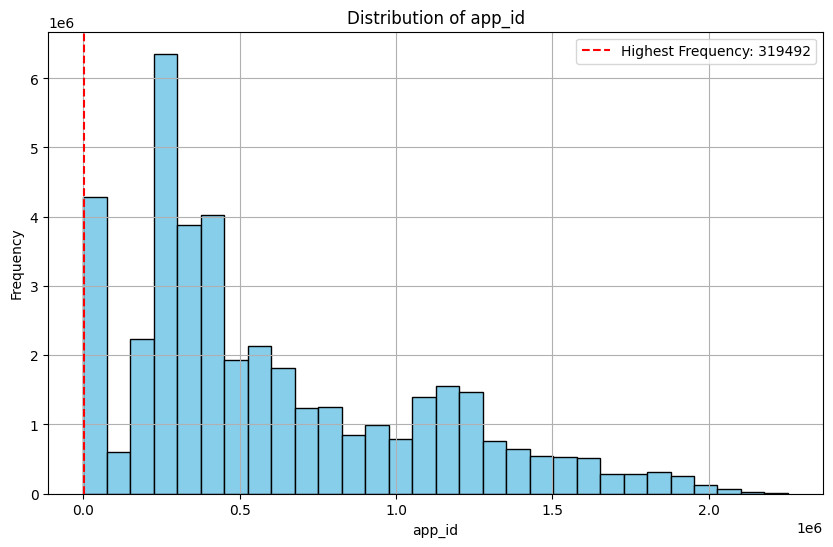

In [ ]:

# Plotting the distribution of 'app_id' column
plt.figure(figsize=(10, 6))
plt.hist(recommendations['app_id'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of app_id')
plt.xlabel('app_id')
plt.ylabel('Frequency')
plt.grid(True)

# Find the frequency of each app_id
app_id_counts = recommendations['app_id'].value_counts()

# Find the app_id with the highest frequency
most_common_app_id = app_id_counts.idxmax()
highest_frequency = app_id_counts.max()

# Plot vertical line for the most frequent app_id
plt.axvline(x=most_common_app_id, color='red', linestyle='--', label=f'Highest Frequency: {highest_frequency}')
plt.legend()

plt.show()

In [ ]:
# Find the frequency of each app_id
app_id_counts = recommendations['app_id'].value_counts()

# Find the app_id with the highest frequency
most_common_app_id = app_id_counts.idxmax()
highest_frequency = app_id_counts.max()

print("App ID with the highest frequency:", most_common_app_id)
print("Frequency:", highest_frequency)

App ID with the highest frequency: 440
Frequency: 319492


In [ ]:
num_values = recommendations['is_recommended'].value_counts()

In [ ]:
num_values

True     35304398
False     5850396
Name: is_recommended, dtype: int64

recommendation_with_score

In [4]:
data = pd.read_csv('recommendations_with_score.csv')

In [5]:
data

,Unnamed: 0,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id,is_recommend,hours_log,helpful_score,score,date_factor,recommendation_credibility,recommendation_credibility_normalized,helpful_score_log,recommendation_credibility_normalized_log
0,0,975370,0,0,2022-12-12,True,36.3,51580,0,1,3.618993,1.0,1,0.500000,0.057904,0.10477,0.000000,0.099637
1,1,304390,4,0,2017-02-17,False,11.5,2586,1,-1,2.525729,4.0,6,0.142857,0.046185,0.08356,1.386294,0.080252
2,2,1085660,2,0,2019-11-17,True,336.5,253880,2,1,5.821566,2.0,4,0.200000,0.074516,0.13482,0.693147,0.126474
3,3,703080,0,0,2022-09-23,True,27.4,259432,3,1,3.346389,1.0,1,0.500000,0.053542,0.09687,0.000000,0.092461
4,4,526870,0,0,2021-01-10,True,7.9,23869,4,1,2.186051,1.0,2,0.333333,0.023318,0.04219,0.000000,0.041324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10141729,10141729,953880,0,0,2021-05-12,True,4.4,10801574,10141729,1,1.686399,1.0,2,0.333333,0.017988,0.03255,0.000000,0.032031
10141730,10141730,953880,0,0,2021-12-27,True,49.5,12889697,10141730,1,3.921973,1.0,2,0.333333,0.041834,0.07569,0.000000,0.072962
10141731,10141731,953880,6,0,2021-05-12,False,0.8,14034307,10141731,-1,0.587787,4.0,2,0.333333,0.025079,0.04538,1.386294,0.044380
10141732,10141732,953880,0,0,2021-07-02,True,9.4,14290437,10141732,1,2.341806,1.0,2,0.333333,0.024979,0.04519,0.000000,0.044199


In [6]:
len(data)

10141734

In [ ]:
data.columns

Index(['Unnamed: 0', 'app_id', 'helpful', 'funny', 'date', 'is_recommended',
       'hours', 'user_id', 'review_id', 'is_recommend', 'hours_log',
       'helpful_score', 'score', 'date_factor', 'recommendation_credibility',
       'recommendation_credibility_normalized', 'helpful_score_log',
       'recommendation_credibility_normalized_log'],
      dtype='object')

In [ ]:
# Display descriptive statistics for all columns (including non-numeric)
print(data.describe(include='all'))

          Unnamed: 0        app_id       helpful         funny        date  \
count   1.014173e+07  1.014173e+07  1.014173e+07  1.014173e+07    10141734   
unique           NaN           NaN           NaN           NaN        4441   
top              NaN           NaN           NaN           NaN  2022-11-22   
freq             NaN           NaN           NaN           NaN       44009   
mean    5.070866e+06  6.254168e+05  3.314045e+00  1.168904e+00         NaN   
std     2.927667e+06  4.846247e+05  5.704038e+01  3.970863e+01         NaN   
min     0.000000e+00  1.000000e+01  0.000000e+00  0.000000e+00         NaN   
25%     2.535433e+06  2.647100e+05  0.000000e+00  0.000000e+00         NaN   
50%     5.070866e+06  4.319600e+05  0.000000e+00  0.000000e+00         NaN   
75%     7.606300e+06  1.066780e+06  0.000000e+00  0.000000e+00         NaN   
max     1.014173e+07  2.208920e+06  3.621200e+04  2.367400e+04         NaN   

       is_recommended         hours       user_id     review_id